# IMPORT AND SET UP

In [746]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import nltk

sns.set_style('darkgrid')

In [747]:
#nltk.download_shell()

In [748]:
# import data

messages = [line.rstrip() for line in open('smsspamcollection/SMSSpamCollection')]
messages[0:5]

['ham\tGo until jurong point, crazy.. Available only in bugis n great world la e buffet... Cine there got amore wat...',
 'ham\tOk lar... Joking wif u oni...',
 "spam\tFree entry in 2 a wkly comp to win FA Cup final tkts 21st May 2005. Text FA to 87121 to receive entry question(std txt rate)T&C's apply 08452810075over18's",
 'ham\tU dun say so early hor... U c already then say...',
 "ham\tNah I don't think he goes to usf, he lives around here though"]

In [749]:
# since we can see there is tab separator in above output ('\t'), 
# let's import data using pandas and set the separator

messages = pd.read_csv('smsspamcollection/SMSSpamCollection', sep='\t', names=['label','message'])

# DATA EXPLORATION

In [750]:
messages.head()

,label,message
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [751]:
messages.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5572 entries, 0 to 5571
Data columns (total 2 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   label    5572 non-null   object
 1   message  5572 non-null   object
dtypes: object(2)
memory usage: 87.2+ KB


There are 5572 rows in this data frame.


In [752]:
messages.describe()

,label,message
count,5572,5572
unique,2,5169
top,ham,"Sorry, I'll call later"
freq,4825,30


There are 2 unique subjects in 'label' which is 'spam' and 'ham' and 5169 in message. This means that there are similiar messages in the 'message' column. <br/>

Now let's group the messages by label and see the summary.

In [753]:
# describe by label column

messages.groupby('label').describe()

message                                                               
        count unique                                                top freq
label                                                                       
ham      4825   4516                             Sorry, I'll call later   30
spam      747    653  Please call our customer service representativ...    4

In [754]:
messages.groupby('label').describe()['message']['top']['spam']

'Please call our customer service representative on FREEPHONE 0808 145 4742 between 9am-11pm as you have WON a guaranteed £1000 cash or £5000 prize!'

We can see that most messages for ham is 'Sorry I'll call later' and for spam is 'Please call our customer service representative on FREEPHONE 0808 145 4742 between 9am-11pm as you have WON a guaranteed £1000 cash or £5000 prize!' <br/> <br/>

Let's add a column which is length of messages and explore it.

In [755]:
# add new length column

messages['length'] = messages['message'].apply(len)
messages.head()

,label,message,length
0,ham,"Go until jurong point, crazy.. Available only ...",111
1,ham,Ok lar... Joking wif u oni...,29
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,155
3,ham,U dun say so early hor... U c already then say...,49
4,ham,"Nah I don't think he goes to usf, he lives aro...",61


C:\Users\nannisaymy\Anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='length'>

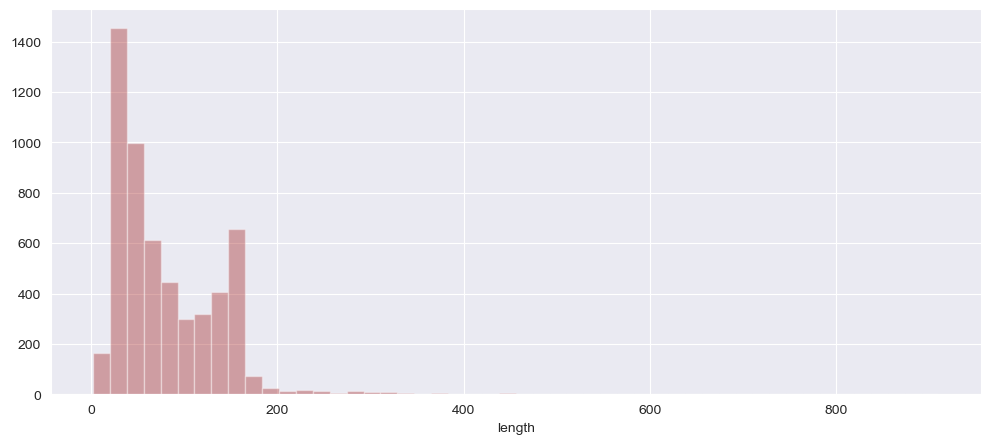

In [756]:
# plot length of messages

plt.figure(figsize=(12,5))
sns.distplot(messages['length'], kde=False, color='brown')

Distribution of the length of messages is bimodal, centred around 50 and 160.

In [757]:
# summary of length

messages['length'].describe()

count    5572.000000
mean       80.489950
std        59.942907
min         2.000000
25%        36.000000
50%        62.000000
75%       122.000000
max       910.000000
Name: length, dtype: float64

The shortest message has 2 letters while the longest has 910 letters. Let's see these messages.

In [758]:
messages[messages['length']==2]

,label,message,length
1925,ham,Ok,2
3051,ham,Ok,2
4498,ham,Ok,2
5357,ham,Ok,2


In [759]:
messages[messages['length']==910]['message'].iloc[0]

"For me the love should start with attraction.i should feel that I need her every time around me.she should be the first thing which comes in my thoughts.I would start the day and end it with her.she should be there every time I dream.love will be then when my every breath has her name.my life should happen around her.my life will be named to her.I would cry for her.will give all my happiness and take all her sorrows.I will be ready to fight with anyone for her.I will be in love when I will be doing the craziest things for her.love will be when I don't have to proove anyone that my girl is the most beautiful lady on the whole planet.I will always be singing praises for her.love will be when I start up making chicken curry and end up makiing sambar.life will be the most beautiful then.will get every morning and thank god for the day because she is with me.I would like to say a lot..will tell later.."

Now, we will plot the histogram of length of messages and separate it by label.

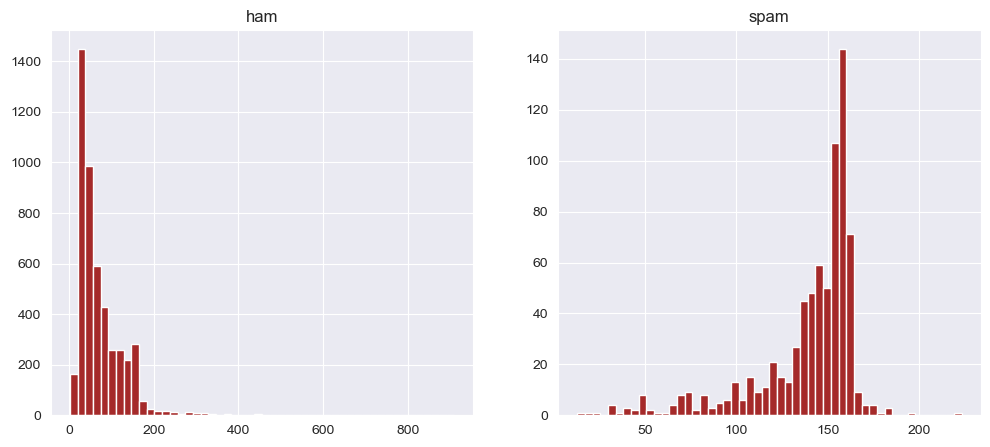

In [760]:
plt.figure(figsize=(12,5))
plt.subplot(1,2,1)
plt.hist(messages[messages['label']=='ham']['length'], bins=50, color='brown')
plt.title('ham')
plt.subplot(1,2,2)
plt.hist(messages[messages['label']=='spam']['length'], bins=50, color='brown')
plt.title('spam')
plt.show()

We can see that spam messages tend to have more characters than ham messages.<br/>
Ham messages centered around 50 and spam messages centered around 160.

# TEXT PREPROCESSING

In this section, we will create a function that will remove the punctuations and common words from the messages.<br/> 
Also, we will transform the string of messages into a list of words.<br/>
The punctuations is listed in 'string' library and common words in 'stopwords'.

In [761]:
import string                       #to remove punctuations
from nltk.corpus import stopwords   #to remove common words

In [762]:
def text_preprocessing(message) :
    # remove punctuation 
    words_no_punc = [word for word in message if word not in string.punctuation]
    
    # join characters in words_no_punc
    words_no_punc = ''.join(words_no_punc)
    
    # remove common words on stopwords
    return [word for word in words_no_punc.split() if word.lower() not in stopwords.words('english')]

Now that the function is ready, let's apply it to some messages and see the result.

In [763]:
messages['message'].head(5).apply(text_preprocessing)

0    [Go, jurong, point, crazy, Available, bugis, n...
1                       [Ok, lar, Joking, wif, u, oni]
2    [Free, entry, 2, wkly, comp, win, FA, Cup, fin...
3        [U, dun, say, early, hor, U, c, already, say]
4    [Nah, dont, think, goes, usf, lives, around, t...
Name: message, dtype: object

# VECTORIZATION

Now that we have our messages in form of words or tokens, we will convert this into vector so that machine learning can understand. <br/>

We will do this by :
1. Count the number of times a word appear in a message.
2. Weigh and normalize the counts, so that frequent tokens get lower weight (term frequency-inverse document    frequency)

In [765]:
from sklearn.feature_extraction.text import CountVectorizer

Step 1 :

In [766]:
bow_transformer = CountVectorizer(analyzer=text_preprocessing).fit(messages['message'])

Now that we have our transformer ready, let's try transform one message

In [770]:
# let's try trasnform one row from training list

mess1 = messages['message'][3]
print(mess1)

U dun say so early hor... U c already then say...


In [771]:
# bag of words for mess1 

bow1 = bow_transformer.transform([mess1])
print(bow1)

  (0, 4068)	2
  (0, 4629)	1
  (0, 5261)	1
  (0, 6204)	1
  (0, 6222)	1
  (0, 7186)	1
  (0, 9554)	2


In [773]:
# let's explore what the vector referring to

print(bow_transformer.get_feature_names()[4068])
print(bow_transformer.get_feature_names()[4629])
print(bow_transformer.get_feature_names()[5261])

U
already
c


From above result, we can see that some words are missing. This is because, those are common words which has been removed during processing step. <br/>

Now that everything works fine, let's transform the whole 'message' column.<br/>
The vector will be stored in sparse matrix form.

In [774]:
# bag-of-words for message column

messages_bow = bow_transformer.transform(messages['message'])

In [775]:
# shape of the sparse matrix

print('Shape of Sparse Matrix : ', messages_bow.shape)

Shape of Sparse Matrix :  (5572, 11425)


In [776]:
# count of non zero occurences

messages_bow.nnz

50548

Now that we have matrix of term frequency ready, let's weigh and normalize it using TF-IDF in scikit-learn.<br/>

(TF - for normalization<br/>
 IDF - for weighting)

In [777]:
# Term Frequency Inverse Document Frequency (TFIDF)

from sklearn.feature_extraction.text import TfidfTransformer

In [778]:
# tfidf of the bag-of-words of the message column

tfidf_transformer = TfidfTransformer().fit(messages_bow)

Since the TFIDF transformer is ready, let's try it on the message[1] that we used previously and try to find the TFIDF of a word.

In [779]:
# let's try find TFIDF of one of the vector of bag-of-word

tfidf1 = tfidf_transformer.transform(bow1)

In [780]:
print(tfidf1)

  (0, 9554)	0.5385626262927564
  (0, 7186)	0.4389365653379857
  (0, 6222)	0.3187216892949149
  (0, 6204)	0.29953799723697416
  (0, 5261)	0.29729957405868723
  (0, 4629)	0.26619801906087187
  (0, 4068)	0.40832589933384067


In [781]:
# if want to find the TFIDF of a word :

tfidf_transformer.idf_[bow_transformer.vocabulary_['university']]

8.527076498901426

Now that everything works fine, let's transform it on the whole 'message' column.

In [782]:
# TFIDF of bag-of-word of message column

messages_tfidf = tfidf_transformer.transform(messages_bow)

# SPLIT DATA INTO TRAINING AND TESTING DATA

Our data has been transformed into a form that machine learning can read. <br/>
Before we move to the model building, let's split the cleaned data into training and testing dataset.

In [785]:
X = messages_tfidf
y = messages['label']

from sklearn.model_selection import train_test_split
msg_train, msg_test, label_train, label_test = train_test_split(X, y, test_size=0.3)

# MODELLING, PREDICTION & EVALUATION

We will use Naive Bayes as the classifier.

In [786]:
from sklearn.naive_bayes import MultinomialNB

In [790]:
spam_detect_model = MultinomialNB().fit(msg_train, label_train)

In [800]:
# PREDICTION

predictions = spam_detect_model.predict(msg_test)

In [792]:
# EVALUATIONS

from sklearn.metrics import classification_report, confusion_matrix

print(classification_report(label_test, predictions))
print(confusion_matrix(label_test, predictions))

              precision    recall  f1-score   support

         ham       0.95      1.00      0.98      1457
        spam       1.00      0.67      0.81       215

    accuracy                           0.96      1672
   macro avg       0.98      0.84      0.89      1672
weighted avg       0.96      0.96      0.95      1672

[[1457    0]
 [  70  145]]


Looking at the above report, we can say that our model is quite good to classify the email, whether it's a spam or a normal messages.

# PIPELINE

A simpler method to transform, normalize and do modelling, we can use pipeline function.<br/>
We just need to pass in transformer and classifier as the arguments. See below.

In [811]:
# let's split the original messages

msg_train_2, msg_test_2, label_train_2, label_test_2 = train_test_split(messages['message'], 
                                                                        messages['label'],
                                                                        test_size=0.3)

In [812]:
pipeline = Pipeline([
    ('bow', CountVectorizer(analyzer=text_preprocessing)),
    ('tfidf', TfidfTransformer()),
    ('classified', MultinomialNB())
])

In [813]:
pipeline.fit(msg_train_2, label_train_2)

Pipeline(steps=[('bow',
                 CountVectorizer(analyzer=<function text_preprocessing at 0x0000011702C7A040>)),
                ('tfidf', TfidfTransformer()),
                ('classified', MultinomialNB())])

In [815]:
predictions2 = pipeline.predict(msg_test_2)

In [816]:
print(classification_report(label_test_2, predictions2))
print(confusion_matrix(label_test_2, predictions2))

              precision    recall  f1-score   support

         ham       0.95      1.00      0.98      1445
        spam       1.00      0.69      0.82       227

    accuracy                           0.96      1672
   macro avg       0.98      0.85      0.90      1672
weighted avg       0.96      0.96      0.95      1672

[[1445    0]
 [  70  157]]
